# Idea: 

### Men tend to take longer bike trips than womens do.

# Null Hypothesis:

### The average duration of biketrips taken by women is not significantly different from that by men. 

# Alternative Hypothesis:

### The average duration of biketrips taken by men is longer than that by women.

### I will a significance level $\alpha = 0.05$, which means I want the probability of getting a result at least as significant as mine to be less then 5%


In [61]:
from __future__  import print_function, division
from matplotlib import pyplot
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
def getCitiBikeData(datestring):
    print("downloading", datestring)
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    os.system("unzip " + datestring + "-citibike-tripdata.zip")
    df = pd.read_csv(datestring + '-citibike-tripdata.csv')
    return df

In [63]:
datestring = '201501'
df = getCitiBikeData(datestring)

downloading 201501


In [64]:
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [65]:
df_r = df[['tripduration', 'gender']]
df_r.head()

,tripduration,gender
0,1346,2
1,363,1
2,346,1
3,182,1
4,969,1


#### In this csv file gender == 1 is male, gender == 2 is female
#### Let's separate males (_m) from females (_f) for analysis

In [66]:
df_m = df_r[df_r['gender'] == 1]
df_f = df_r[df_r['gender'] == 2]

#get rid of the outliers
df_m = df_m[np.abs(df_m.tripduration-df_m.tripduration.mean()) <= (3*df_m.tripduration.std())]
df_f = df_f[np.abs(df_f.tripduration-df_f.tripduration.mean()) <= (3*df_f.tripduration.std())]

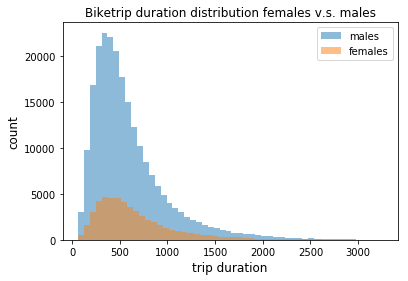

In [67]:
pyplot.hist(df_m['tripduration'], 50, alpha=0.5, label='males')
pyplot.hist(df_f['tripduration'], 50, alpha=0.5, label='females')
pyplot.legend(loc='upper right')
pyplot.xlabel('trip duration', fontsize = 12)
pyplot.ylabel('count', fontsize = 12)
pyplot.title('Biketrip duration distribution females v.s. males')
pyplot.show()

### Figure 1: Biketrip duration distribution females v.s. males
#### This figure shows the distribution of biketrip durations by men and women. It seems their average durations are similar, so I have a feeling the I won't be able to reject the null hypothesis, but a formal test is still required. Also, the graph shows that there were way more male cyclists than female cyclists. 

### [ The plots for two dataframes are combined into one for the sake of clearness.]